In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter as c
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('Indicators.csv')
data.shape

FileNotFoundError: [Errno 2] No such file or directory: 'Indicators.csv'

In [ ]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [ ]:
data.tail(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656448,Zimbabwe,ZWE,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,2015,5.0
5656449,Zimbabwe,ZWE,Tax payments (number),IC.TAX.PAYM,2015,49.0
5656450,Zimbabwe,ZWE,Time required to build a warehouse (days),IC.WRH.DURS,2015,448.0
5656451,Zimbabwe,ZWE,Time required to enforce a contract (days),IC.LGL.DURS,2015,410.0
5656452,Zimbabwe,ZWE,Time required to get electricity (days),IC.ELC.TIME,2015,106.0
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


In [ ]:
data.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [ ]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [ ]:
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [ ]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [ ]:
years = data['Year'].unique().tolist()
len(years)

56

In [ ]:
print(min(years)," to ",max(years))

1960  to  2015


In [ ]:
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)
stage = data[mask1 & mask2]

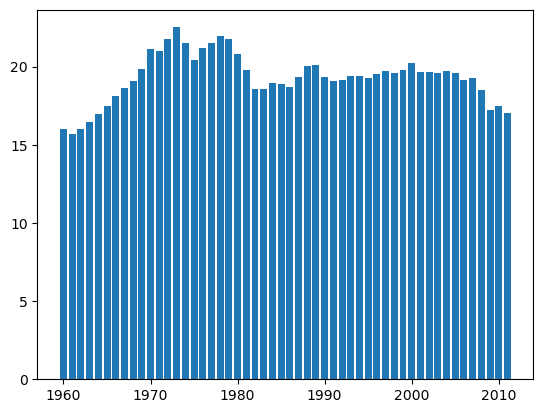

In [ ]:
years = stage['Year'].values
co2 = stage['Value'].values
plt.bar(years,co2)
plt.show()

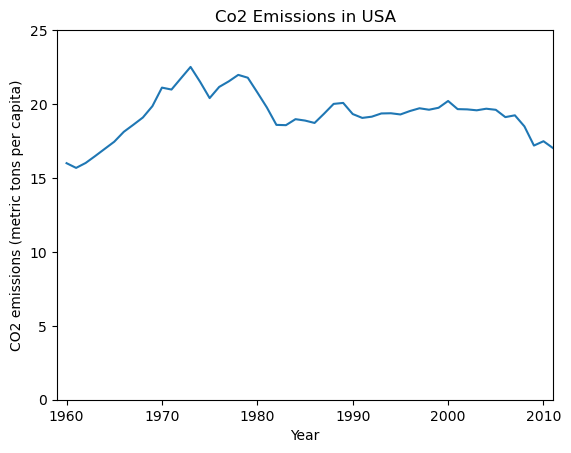

In [ ]:
plt.plot(stage['Year'].values, stage['Value'].values)
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])
plt.title('Co2 Emissions in USA')
plt.axis([1959, 2011,0,25])
plt.show()

In [ ]:
hist_data = stage['Value'].values

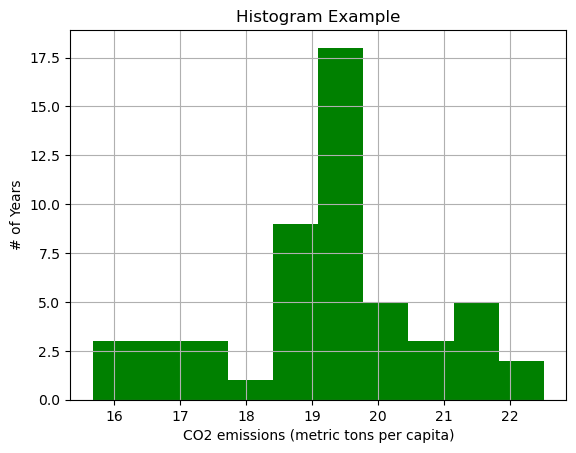

In [ ]:
plt.hist(hist_data, 10, density=False, facecolor='green')
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')
plt.grid(True)
plt.show()

In [ ]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


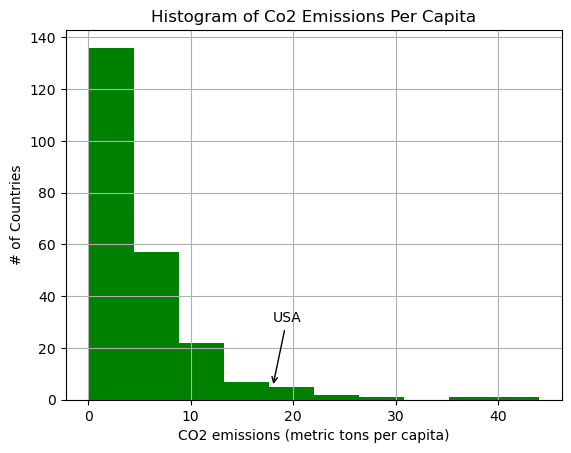

In [ ]:
fig, ax = plt.subplots()
ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of Co2 Emissions Per Capita')
plt.grid(True)
plt.show()

In [ ]:
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)
gdp_stage = data[mask1 & mask2]

In [ ]:
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


In [ ]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


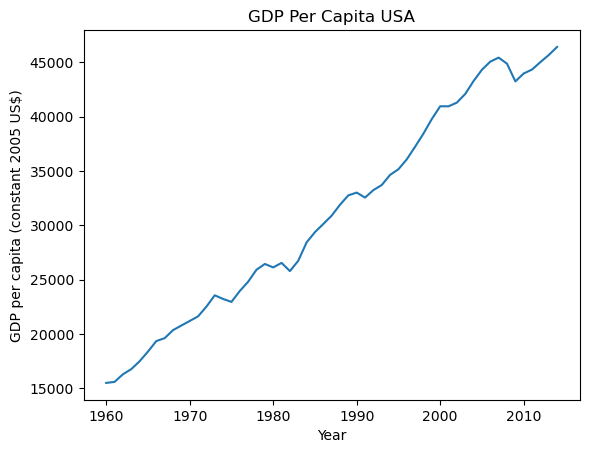

In [ ]:
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
plt.title('GDP Per Capita USA')
plt.show()

In [ ]:
print("GDP Min Year =", gdp_stage['Year'].min(),", Max =", gdp_stage['Year'].max())
print("Co2 Min Year =", stage['Year'].min(),", Max =", stage['Year'].max())

GDP Min Year = 1960 , Max = 2014
Co2 Min Year = 1960 , Max = 2011


In [ ]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


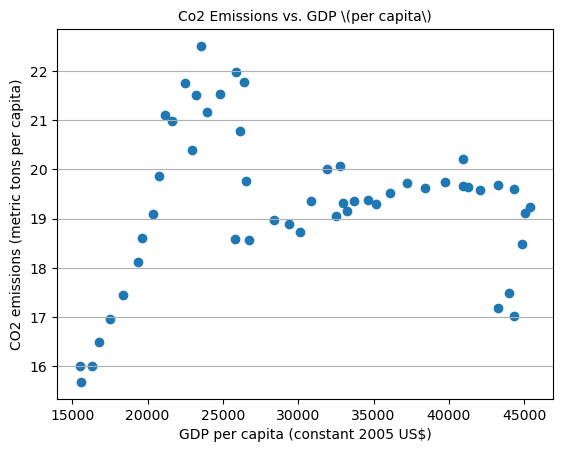

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('Co2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[10],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)
X = gdp_stage_trunc['Value']
Y = stage['Value']
axis.scatter(X, Y)
plt.show()

In [ ]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

In [ ]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([1, 1, 4], dtype=int64))

In [ ]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
      dtype=object)

In [ ]:
for i in cat:
    print("Column :",i)
    print('count of classes : ',data[i].nunique())
    print(c(data[i]))
    print('*'*120)

Column : CountryName
count of classes :  247
Counter({'Mexico': 37244, 'Colombia': 37227, 'Philippines': 36912, 'Peru': 36815, 'Costa Rica': 36457, 'Thailand': 36355, 'Morocco': 36275, 'Indonesia': 36252, 'Malaysia': 35874, 'Turkey': 35819, 'Ecuador': 35788, 'Pakistan': 35768, 'India': 35721, 'Brazil': 35550, 'Egypt, Arab Rep.': 35367, 'Bolivia': 35307, 'Tunisia': 35302, 'Honduras': 35171, 'Guatemala': 35078, 'El Salvador': 34739, 'Kenya': 34621, 'Algeria': 34578, 'Cameroon': 34259, 'Dominican Republic': 34253, 'Jordan': 34050, 'Senegal': 33990, 'Panama': 33984, 'Nicaragua': 33638, 'Bangladesh': 33386, 'Sri Lanka': 33369, 'Togo': 33221, 'Iran, Islamic Rep.': 32966, 'Benin': 32965, 'Zambia': 32930, 'Madagascar': 32637, 'Burkina Faso': 32604, 'Congo, Rep.': 32310, 'Mauritius': 32285, 'Botswana': 32039, 'Jamaica': 31835, 'Rwanda': 31770, 'Ghana': 31730, 'Paraguay': 31423, 'Uganda': 31412, 'Nigeria': 31381, 'Congo, Dem. Rep.': 31257, 'Sudan': 31175, 'Latin America & Caribbean (developing o

count of classes :  1344
Counter({'Population, total': 13484, 'Population growth (annual %)': 13442, 'Rural population (% of total population)': 13415, 'Urban population (% of total)': 13415, 'Rural population': 13374, 'Urban population': 13374, 'Urban population growth (annual %)': 13337, 'Surface area (sq. km)': 13090, 'Land area (sq. km)': 13086, 'Rural population growth (annual %)': 13061, 'Population density (people per sq. km of land area)': 12988, 'Death rate, crude (per 1,000 people)': 12486, 'Adolescent fertility rate (births per 1,000 women ages 15-19)': 12485, 'Birth rate, crude (per 1,000 people)': 12485, 'Population ages 65 and above (% of total)': 12426, 'Population, ages 0-14 (% of total)': 12426, 'Population, ages 15-64 (% of total)': 12426, 'Population, female (% of total)': 12426, 'Age dependency ratio (% of working-age population)': 12423, 'Age dependency ratio, old (% of working-age population)': 12423, 'Age dependency ratio, young (% of working-age population)': 12

count of classes :  1344
Counter({'SP.POP.TOTL': 13484, 'SP.POP.GROW': 13442, 'SP.RUR.TOTL.ZS': 13415, 'SP.URB.TOTL.IN.ZS': 13415, 'SP.RUR.TOTL': 13374, 'SP.URB.TOTL': 13374, 'SP.URB.GROW': 13337, 'AG.SRF.TOTL.K2': 13090, 'AG.LND.TOTL.K2': 13086, 'SP.RUR.TOTL.ZG': 13061, 'EN.POP.DNST': 12988, 'SP.DYN.CDRT.IN': 12486, 'SP.ADO.TFRT': 12485, 'SP.DYN.CBRT.IN': 12485, 'SP.POP.65UP.TO.ZS': 12426, 'SP.POP.0014.TO.ZS': 12426, 'SP.POP.1564.TO.ZS': 12426, 'SP.POP.TOTL.FE.ZS': 12426, 'SP.POP.DPND': 12423, 'SP.POP.DPND.OL': 12423, 'SP.POP.DPND.YG': 12423, 'SP.DYN.LE00.FE.IN': 12304, 'SP.DYN.LE00.MA.IN': 12304, 'SP.DYN.LE00.IN': 12304, 'SP.DYN.TFRT.IN': 12266, 'SP.DYN.TO65.FE.ZS': 12258, 'SP.DYN.TO65.MA.ZS': 12258, 'SP.DYN.AMRT.FE': 11939, 'SP.DYN.AMRT.MA': 11939, 'AG.LND.AGRI.K2': 11751, 'AG.PRD.FOOD.XD': 11669, 'AG.LND.AGRI.ZS': 11645, 'AG.PRD.LVSK.XD': 11626, 'AG.LND.ARBL.ZS': 11568, 'AG.PRD.CROP.XD': 11563, 'AG.LND.ARBL.HA.PC': 11545, 'TX.VAL.MRCH.CD.WT': 11248, 'SP.DYN.IMRT.IN': 11201, 'SH.DYN

In [ ]:
data.dtypes[data.dtypes!='O'].index.values

array(['Year', 'Value'], dtype=object)

In [ ]:
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [ ]:
data.isnull().sum()

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

In [ ]:
data=data[data['CountryCode'].str.contains("USA|SGP|IND|ARB|BRB")]

In [ ]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [ ]:
data1=data.copy()
from sklearn.preprocessing import LabelEncoder 
x='*'
for i in cat:
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()
    print(c(data[i])) 
    data[i] = LE.fit_transform(data[i]) 
    print(c(data[i])) 
    print(x*100)

LABEL ENCODING OF: CountryName
Counter({'India': 35721, 'United States': 24425, 'Singapore': 22600, 'Barbados': 17611, 'Arab World': 17115})
Counter({2: 35721, 4: 24425, 3: 22600, 1: 17611, 0: 17115})
****************************************************************************************************
LABEL ENCODING OF: CountryCode
Counter({'IND': 35721, 'USA': 24425, 'SGP': 22600, 'BRB': 17611, 'ARB': 17115})
Counter({2: 35721, 4: 24425, 3: 22600, 1: 17611, 0: 17115})
****************************************************************************************************
LABEL ENCODING OF: IndicatorName
Counter({'Mortality rate, infant (per 1,000 live births)': 280, 'Mortality rate, under-5 (per 1,000)': 280, 'Adolescent fertility rate (births per 1,000 women ages 15-19)': 275, 'Age dependency ratio (% of working-age population)': 275, 'Age dependency ratio, old (% of working-age population)': 275, 'Age dependency ratio, young (% of working-age population)': 275, 'Merchandise exports (curr

Counter({'SP.DYN.IMRT.IN': 280, 'SH.DYN.MORT': 280, 'SP.ADO.TFRT': 275, 'SP.POP.DPND': 275, 'SP.POP.DPND.OL': 275, 'SP.POP.DPND.YG': 275, 'TX.VAL.MRCH.CD.WT': 275, 'TM.VAL.MRCH.CD.WT': 275, 'SP.POP.65UP.TO.ZS': 275, 'SP.POP.0014.TO.ZS': 275, 'SP.POP.1564.TO.ZS': 275, 'SP.POP.TOTL.FE.ZS': 275, 'SP.POP.TOTL': 275, 'SP.RUR.TOTL': 275, 'SP.RUR.TOTL.ZS': 275, 'SP.URB.TOTL': 275, 'SP.URB.TOTL.IN.ZS': 275, 'SP.POP.GROW': 274, 'SP.URB.GROW': 274, 'SP.DYN.CBRT.IN': 270, 'SP.DYN.CDRT.IN': 270, 'SP.DYN.LE00.FE.IN': 270, 'SP.DYN.LE00.MA.IN': 270, 'SP.DYN.LE00.IN': 270, 'SP.DYN.TO65.FE.ZS': 270, 'SP.DYN.TO65.MA.ZS': 270, 'AG.LND.TOTL.K2': 270, 'EN.POP.DNST': 270, 'AG.SRF.TOTL.K2': 270, 'SP.DYN.TFRT.IN': 269, 'TX.VAL.MRCH.WL.CD': 268, 'TX.VAL.MRCH.RS.ZS': 268, 'TX.VAL.MRCH.R3.ZS': 268, 'TX.VAL.MRCH.R5.ZS': 268, 'TX.VAL.MRCH.R6.ZS': 268, 'TX.VAL.MRCH.OR.ZS': 268, 'TX.VAL.MRCH.AL.ZS': 268, 'TX.VAL.MRCH.HI.ZS': 268, 'TM.VAL.MRCH.WL.CD': 268, 'TM.VAL.MRCH.RS.ZS': 268, 'TM.VAL.MRCH.R3.ZS': 268, 'TM.VAL.M

In [ ]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,0,0,40,1181,1960,1.335609e+02
1,0,0,44,1204,1960,8.779760e+01
2,0,0,45,1205,1960,6.634579e+00
3,0,0,46,1206,1960,8.102333e+01
4,0,0,86,636,1960,3.000000e+06


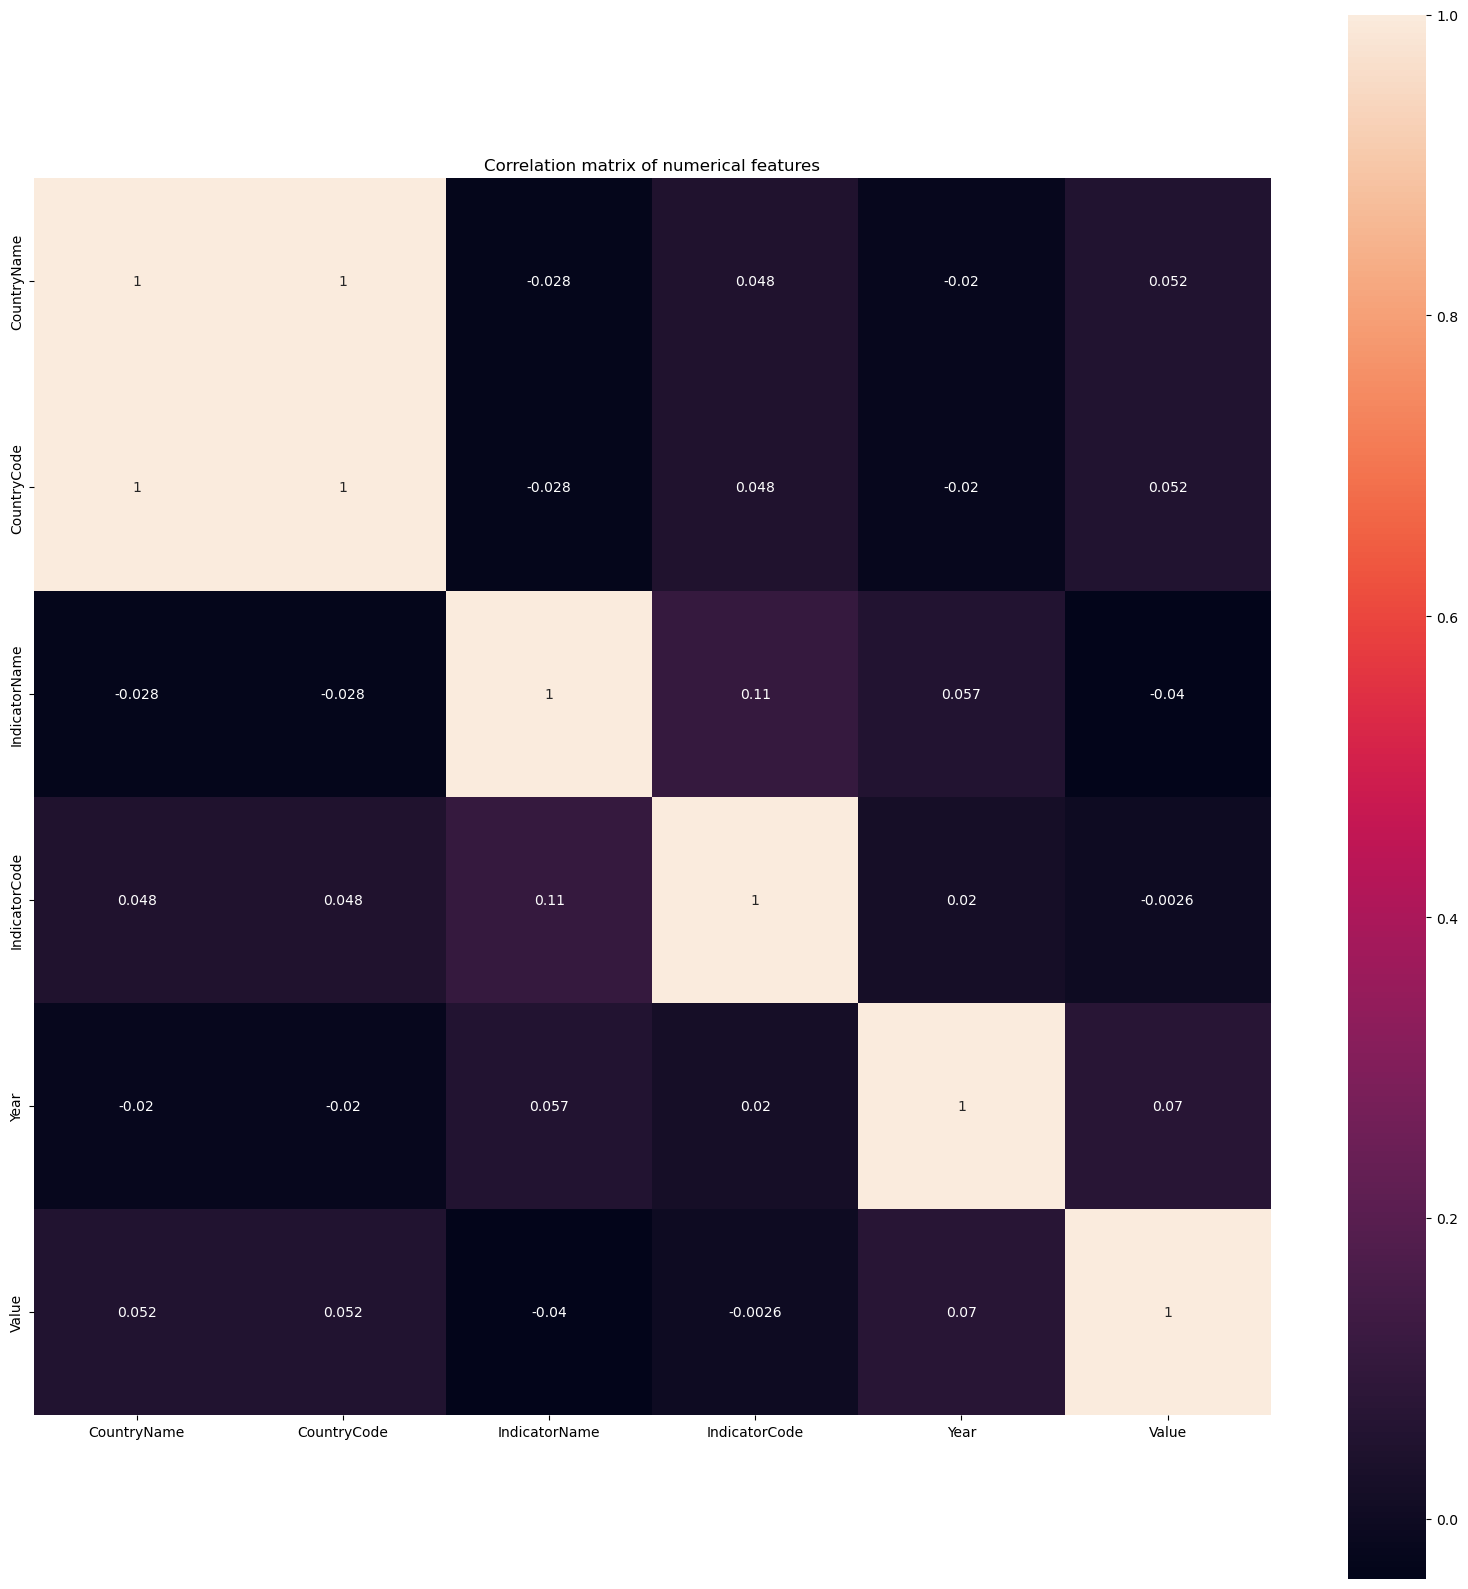

In [ ]:
corr = data.corr() 
plt.subplots(figsize=(16,16));
sns.heatmap(corr, annot=True, square=True) 
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

<AxesSubplot:>

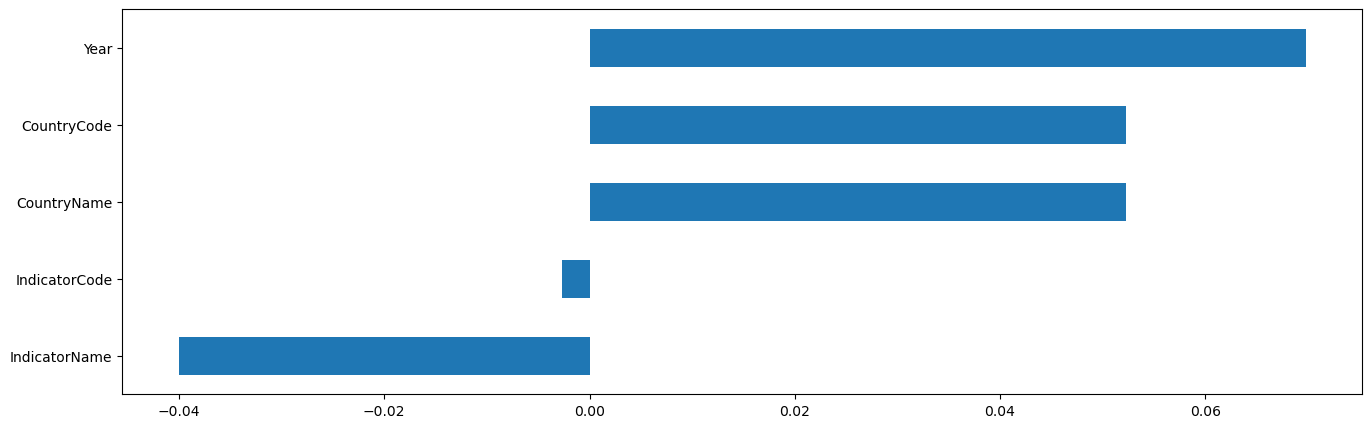

In [ ]:
plt.figure(figsize=(16,5))
corr["Value"].sort_values(ascending=True)[:-1].plot(kind="barh")

In [ ]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,0,0,40,1181,1960,1.335609e+02
1,0,0,44,1204,1960,8.779760e+01
2,0,0,45,1205,1960,6.634579e+00
3,0,0,46,1206,1960,8.102333e+01
4,0,0,86,636,1960,3.000000e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117472 entries, 0 to 5655835
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CountryName    117472 non-null  int32  
 1   CountryCode    117472 non-null  int32  
 2   IndicatorName  117472 non-null  int32  
 3   IndicatorCode  117472 non-null  int32  
 4   Year           117472 non-null  int64  
 5   Value          117472 non-null  float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 4.5 MB


In [ ]:
x = data.drop(['Value','IndicatorCode'],axis=1) #independet features
x=pd.DataFrame(x)
y = data['Value'] #dependent feature
y=pd.DataFrame(y)

In [ ]:
x.head()

,CountryName,CountryCode,IndicatorName,Year
0,0,0,40,1960
1,0,0,44,1960
2,0,0,45,1960
3,0,0,46,1960
4,0,0,86,1960


In [ ]:
y.head()

,Value
0,1.335609e+02
1,8.779760e+01
2,6.634579e+00
3,8.102333e+01
4,3.000000e+06


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
type(y)

pandas.core.frame.DataFrame

In [ ]:
data['CountryCode'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
data.shape

(117472, 6)

In [ ]:
data["CountryName"].unique()

array([0, 1, 2, 3, 4])

In [ ]:
x=x.values

In [ ]:
y=y.values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

(93977, 4)
(23495, 4)


# Building Model

### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor(n_estimators=100, random_state=0)
rand.fit(x_train,y_train.ravel())

RandomForestRegressor(random_state=0)

In [ ]:
x_test

array([[   3,    3,  602, 1965],
       [   0,    0,  775, 1994],
       [   2,    2,  843, 2011],
       ...,
       [   4,    4,   40, 1987],
       [   0,    0,  854, 1971],
       [   1,    1,  236, 1990]], dtype=int64)

In [ ]:
from collections import Counter as c
c(data["CountryCode"])

Counter({0: 17115, 1: 17611, 2: 35721, 3: 22600, 4: 24425})

In [ ]:
c(data["CountryName"])

Counter({0: 17115, 1: 17611, 2: 35721, 3: 22600, 4: 24425})

In [ ]:
ypred=rand.predict(x_test)
print(ypred)

[1.08442312e+00 1.31807605e+05 1.64213410e+11 ... 5.32503420e+01
 8.85459500e+08 4.97509551e+01]


In [ ]:
y_test

array([[1.30605650e+00],
       [6.98730552e+00],
       [2.66711608e-01],
       ...,
       [5.32790000e+01],
       [7.30710000e+08],
       [5.11174508e+01]])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.9860585434509036

In [ ]:
rand.score(x_train,y_train)

0.9966008386013232

### Multi linear Regression

In [ ]:
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_linpred=mr.predict(x_test)

In [ ]:
r2_score(y_test,y_linpred)

0.00918262523882607

In [ ]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,0,0,40,1181,1960,1.335609e+02
1,0,0,44,1204,1960,8.779760e+01
2,0,0,45,1205,1960,6.634579e+00
3,0,0,46,1206,1960,8.102333e+01
4,0,0,86,636,1960,3.000000e+06


In [ ]:
import pickle
pickle.dump(rand,open("co2.pickle","wb"))

### DecisionTreeRegressor 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor(random_state=0)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_dtpred=dt.predict(x_test)

In [ ]:
r2_score(y_test,y_dtpred)

0.9894087744610102

In [ ]:
import pickle
pickle.dump(dt,open("co2.pickle","wb"))